- Dynamic programming is mainly an optimization over recursion
    - By breaking up the problem into sub-problems and storing the results of the sub-problems, you can save yourself time re-running calculations
    - Example: 6+5+3+2+1+3+6+5
        - We see 6+5 twice, so storing it would save us time re-calculating it
- <b>Dynamic programming trades memory efficiency for increased speed </b>

# Recursion vs DP

- We will use the Fibonacci sequence to demonstrate the difference in efficiency
- Fibonacci sequence is that n = the sum of the two previous sequences

In [1]:
import time
import matplotlib.pyplot as plt

In [14]:
calculated = {}
def fib(n):
    t0 = time.time()
    
    if n == 0: # base case 1
        r = 0
        return [time.time() - t0, r] 
    if n == 1: # base case 2
        r =  1
        return [time.time() - t0, r]
    elif n in calculated:
        r = calculated[n]
    else: # recursive step
        calculated[n] = Fib(n-1) + Fib(n-2)
        r = calculated[n]
        
    return [time.time() - t0,r]

In [15]:
def Fib(n):
    """
    Recursive Fibonacci solution
    """
    t0 = time.time()
    if n < 2:
        return n
    else:
        return Fib(n-1) + Fib(n-2)

In [16]:
def RecFib(n):
    """
    Recursive Fibonacci solution
    """
    t0 = time.time()
    if n < 2:
        r = n
    else:
        r = Fib(n-1) + Fib(n-2)
        
    return [time.time() - t0,r]

In [17]:
dp_calculated = {0:0,
             1:1,
             2:1}

def DPFib(n):
    """
    Dynamic programming solution for finding Fibonacci numbers using memoization
    """
    
    t0 = time.time()
    # Store the values
    
    if n in dp_calculated.keys():
        r = dp_calculated[n]
        return (time.time() - t0,r)
    
    elif n-1 in dp_calculated.keys() and n-2 in dp_calculated.keys():
        r = dp_calculated[n-1] + dp_calculated[n-2]
    
    elif n-1 in dp_calculated.keys():
        dp_calculated[n-2] = Fib(n-2)
    elif n-2 in dp_calculated.keys():
        dp_calculated[n-1] = Fib(n-1)
        
    else:
        dp_calculated[n-1] = Fib(n-1)
        dp_calculated[n-2] = Fib(n-2)
        
    dp_calculated[n] = dp_calculated[n-1] + dp_calculated[n-2]
    r = dp_calculated[n]
    return [time.time() - t0,r]

In [18]:
%%time
RecTimes = dict([(n,RecFib(n)[0]) for n in range(30)])

CPU times: user 1.46 s, sys: 3.04 ms, total: 1.46 s
Wall time: 1.46 s


In [19]:
%%time
DPTimes = dict([(n,DPFib(n)[0]) for n in range(30)])

# My solution works better because it saves time on computing sub-problems when result is unknown
    # This is probably going to be coming up as the learning progresses though
    
# Turns out this is just how memoization should be properly implemented; example I had originally read
    # was just cacheing results but not the necessary sub-problem results

CPU times: user 92 µs, sys: 8 µs, total: 100 µs
Wall time: 105 µs


In [20]:
%%time
Times = dict([(n,fib(n)[0]) for n in range(30)])

CPU times: user 1.32 s, sys: 3.63 ms, total: 1.32 s
Wall time: 1.32 s


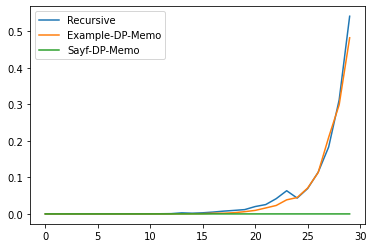

In [21]:
sns.lineplot(x=RecTimes.keys(), y=RecTimes.values(),
            label="Recursive")
sns.lineplot(x=Times.keys(), y=Times.values(),
            label="Example-DP-Memo")
sns.lineplot(x=DPTimes.keys(), y=DPTimes.values(),
            label="Sayf-DP-Memo")

plt.legend()

In [24]:
dp_res = [DPFib(n) for n in range(30)]
dpe_res = [fib(n) for n in range(30)]
rec_res = [RecFib(n) for n in range(30)]

[x[1] for x in dpe_res] == [x[1] for x in dp_res] == [x[1] for x in rec_res]

# Results are all exactly the same so the performance is not a bug

True

## Tabulation

- A bottom-up programming approach
    - Start at the smallest possible sub-problem (base case) and progress to the main problem
- Tabulation is the process of storing the results of the sub-problems as you progress
    - We solve and store every sub-problem between the start and end problems
    - No prioritization of which sub-problems to solve; not the most efficient
- This is best accomplished using arrays or lists since the solutions are sequential

## Memoization

- A top-down approach to solving sub-problems
- Results need to be stored in a non-sequential order so dictionaries are usually the way to go

# Actual code
- Code without the pieces to compare times for the calculation of each iteration
- Below I also perform one last time comparison between the two functions without the time-calculation pieces

In [33]:
calculated = {}
def DPF0(n):
    """
    Example DP Fib from online resource; not as efficient
    https://www.educative.io/blog/python-dynamic-programming-tutorial
    """
    
    if n == 0: # base case 1
        return 0
    if n == 1: # base case 2
        return  1
    elif n in calculated:
        return calculated[n]
    else: # recursive step
        calculated[n] = Fib(n-1) + Fib(n-2)
        return calculated[n]

In [37]:
# Create the memoization dict
memo = {0:0, 1:1, 2:1}

def DPFib(n):
    """
    Dynamic programming solution for finding Fibonacci numbers using memoization
    """
    
    if n in memo.keys(): # If result already present
        return memo[n]
    
    elif n-1 in memo.keys() and n-2 in memo.keys(): # if previous results present
        memo[n] = memo[n-1] + memo[n-2]
        return memo[n]

    # If at least one of necessary previous results is present
    #elif n-1 in memo.keys(): # You cannot have n-1 present and n-2 not present; n-2 is needed for n-1
        #memo[n-2] = Fib(n-2)
    elif n-2 in memo.keys():
        memo[n-1] = DPFib(n-1)
        
    else:
        memo[n-1] = DPFib(n-1)
        memo[n-2] = DPFib(n-2)
        
    memo[n] = memo[n-1] + memo[n-2]
    return memo[n]


In [35]:
%%time
print([DPF0(x) for x in range(0,30)])
print()

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229]

CPU times: user 1.43 s, sys: 36 µs, total: 1.43 s
Wall time: 1.43 s


In [38]:
%%time
print([DPFib(x) for x in range(0,30)])
print()

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229]

CPU times: user 806 µs, sys: 0 ns, total: 806 µs
Wall time: 721 µs
